# Simulating electron - proton collisions 

### Day-1 : Introduction and first run

We will first initialize our simulation toolkit - PYTHIA (pythia.org) and run a few collisions of electrons and protons at varying energies and begin to study the output  


In [1]:
# Importing useful headers
import pythia8
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Initialize the pythia object and setup the type of collisions 

In [2]:
pythia = pythia8.Pythia()
#Set up incoming beams, for frame with unequal beam energies.
pythia.readString("Beams:frameType = 2")

True

In [3]:
# Set the proton energy - 
pEnergy = 920
#BeamA = proton.
pythia.readString("Beams:idA = 2212")
pythia.settings.parm("Beams:eA", pEnergy)

In [4]:
# Set the electron energy - 
eEnergy = 500
#BeamB = electron.
pythia.readString("Beams:idB = 11")
pythia.settings.parm("Beams:eB", eEnergy)

In [5]:

#Set up DIS process within some phase space.
#Neutral current (with gamma/Z interference).
pythia.readString("WeakBosonExchange:ff2ff(t:gmZ) = on")

#Phase-space cut: minimal Q2 of process.
pythia.settings.parm("PhaseSpace:Q2Min", 25)

#Set dipole recoil on. Necessary for DIS + shower.
pythia.readString("SpaceShower:dipoleRecoil = on")

#Allow emissions up to the kinematical limit,
#since rate known to match well to matrix elements everywhere.
pythia.readString("SpaceShower:pTmaxMatch = 2")

#QED radiation off lepton not handled yet by the new procedure.
pythia.readString("PDF:lepton = off")
pythia.readString("TimeShower:QEDshowerByL = off")

pythia.init()


True

In [6]:
Number_of_events = 10

In [13]:

pythia.next()

part_pt = []
part_eta = []
part_phi = []
part_E = []
part_m = []
part_id = []

for particle in pythia.event:
    if particle.isFinal():
        pT = float('%.3g' % particle.pT())
        part_pt.append(pT)
        eta = float('%.3g' % particle.eta())
        part_eta.append(eta)
        phi = float('%.3g' % particle.phi())
        part_phi.append(phi)
        E = float('%.3g' % particle.e())
        part_E.append(E)
        mass = float('%.3g' % particle.m())
        part_m.append(mass)
        part_id.append(particle.id())
        print(particle.id(), pT, eta, phi, E, mass)

part_pt = np.array(part_pt)
part_phi = np.array(part_phi)
part_eta = np.array(part_eta)
part_E = np.array(part_E)
part_m = np.array(part_m)
part_id = np.array(part_id)
particles = np.vstack((part_id, part_pt, part_phi, part_eta, part_E, part_m)).T


11 5.49 -5.11 1.27 455.0 0.000511
211 0.261 -0.158 -1.01 0.299 0.14
-211 0.131 -1.71 2.02 0.398 0.14
211 0.153 -1.53 1.25 0.394 0.14
-211 0.597 -1.16 -1.52 1.05 0.14
211 0.309 -0.0391 1.8 0.34 0.14
-211 0.446 3.69 0.651 8.9 0.14
321 0.471 2.47 -2.21 2.86 0.494
321 0.242 5.03 -1.28 18.6 0.494
-211 0.068 7.95 2.19 96.5 0.14
321 0.196 7.94 1.85 274.0 0.494
-321 0.516 5.69 1.86 76.2 0.494
211 0.402 5.88 -1.98 72.2 0.14
2112 0.196 6.07 -2.64 42.5 0.94
-2212 0.589 5.42 1.27 66.2 0.938
-211 0.334 3.55 -1.53 5.79 0.14
211 1.3 -1.35 -1.92 2.67 0.14
211 0.896 -2.37 -1.73 4.83 0.14
-211 0.266 -0.787 -1.24 0.379 0.14
211 0.0493 3.26 -0.276 0.66 0.14
-211 0.324 -0.119 -2.91 0.355 0.14
211 0.191 3.83 0.57 4.4 0.14
211 0.575 1.28 1.29 1.12 0.14
-211 0.417 1.65 -1.22 1.14 0.14
22 0.413 -1.13 -2.78 0.705 0.0
22 0.412 -1.43 -2.65 0.906 0.0
22 0.2 7.22 -1.11 137.0 0.0
22 0.029 7.94 -2.99 40.7 0.0
22 0.052 2.3 3.07 0.261 0.0
22 0.0816 3.54 -1.37 1.4 0.0
22 0.536 2.77 2.02 4.29 0.0
22 0.152 4.36 2.81 5.93 

In [14]:
runPythia(100, 200)

11 5.86 -5.09 1.29 473.0 0.000511
211 0.174 0.888 -2.26 0.284 0.14
2112 1.33 3.33 -0.814 18.7 0.94
-321 0.434 3.74 -2.65 9.18 0.494
211 0.716 1.05 -2.87 1.16 0.14
-211 0.884 0.629 0.393 1.07 0.14
211 0.0493 1.16 -2.86 0.164 0.14
-211 4.37 -2.16 -2.06 19.2 0.14
211 0.166 6.48 2.44 54.0 0.14
-211 0.686 7.32 -0.398 516.0 0.14
211 0.226 5.36 2.8 24.2 0.14
-211 0.544 5.82 0.263 91.5 0.14
321 0.244 6.69 0.724 98.7 0.494
211 0.434 2.72 0.0734 3.3 0.14
-211 0.243 3.56 2.92 4.29 0.14
211 0.225 5.38 3.11 24.4 0.14
-211 0.101 5.5 -2.06 12.3 0.14
211 0.125 4.72 -2.65 6.97 0.14
-211 0.354 3.35 -0.491 5.03 0.14
211 0.519 -1.72 -2.24 1.51 0.14
-211 0.192 -1.65 -2.89 0.538 0.14
22 0.0726 -2.48 -2.91 0.438 0.0
22 1.08 -2.1 -2.61 4.49 0.0
22 0.107 5.15 0.64 9.25 0.0
22 0.346 4.98 1.33 25.2 0.0
22 0.175 3.98 0.814 4.7 0.0
22 0.113 4.88 1.06 7.43 0.0
22 0.0567 2.9 0.433 0.519 0.0
22 0.104 3.28 2.49 1.39 0.0
22 0.184 -0.927 -1.41 0.268 0.0
22 0.109 -0.207 -2.03 0.111 0.0


#### Worksheet to guide the structured tutorial, varying the setup - to build intuition 
what did we start with, and what did we change, and what did we see - learning objectives for the day 
something to guide the activities 
connect to big picture of why it matters 
### where did we get this simulation from? is this just random or what are these numbers 
#### dice rolls 

In [15]:
Event_Particles = pd.DataFrame(particles, columns=['ID','pT','phi','eta','Energy','mass'])
Event_Particles

,ID,pT,phi,eta,Energy,mass
0,11.0,5.4900,1.270,-5.1100,455.0000,0.000511
1,211.0,0.2610,-1.010,-0.1580,0.2990,0.140000
2,-211.0,0.1310,2.020,-1.7100,0.3980,0.140000
3,211.0,0.1530,1.250,-1.5300,0.3940,0.140000
4,-211.0,0.5970,-1.520,-1.1600,1.0500,0.140000
5,211.0,0.3090,1.800,-0.0391,0.3400,0.140000
6,-211.0,0.4460,0.651,3.6900,8.9000,0.140000
7,321.0,0.4710,-2.210,2.4700,2.8600,0.494000
8,321.0,0.2420,-1.280,5.0300,18.6000,0.494000
9,-211.0,0.0680,2.190,7.9500,96.5000,0.140000


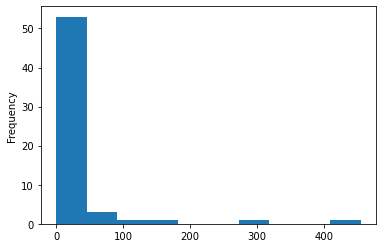

In [16]:
Event_Particles['Energy'].plot.hist()
plt.show()

In [17]:

delphi = []
deleta = []
scattered_pT = []
photon_pT = []

# Begin event loop. Generate event. Skip if error.
for iEvent in range(0, Number_of_events):
    if not pythia.next():
        continue
    proton = pythia.event[1].p()
    electron_in = pythia.event[4].p()
    electron_out = pythia.event[6].p()
    photon = electron_in - electron_out
    deta = photon.eta()
    dphi = photon.phi()
    if dphi > 3.1415:
        dphi = 6.2832 - dphi    
    delphi.append(dphi)
    deleta.append(deta)
    scattered_pT.append(electron_out.pT())
    photon_pT.append(photon.pT())

delphi = np.array(delphi)
deleta = np.array(deleta)
scattered_pT = np.array(scattered_pT)
photon_pT = np.array(photon_pT)
# End of event loop. Statistics. Histogram. Done.
pythia.stat()


(array([2., 0., 0., 1., 0., 0., 1., 1., 1., 4.]),
 array([-5.06678619, -4.56515554, -4.06352489, -3.56189424, -3.06026359,
        -2.55863295, -2.0570023 , -1.55537165, -1.053741  , -0.55211035,
        -0.0504797 ]),
 <BarContainer object of 10 artists>)

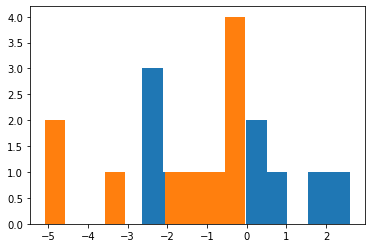

In [34]:
plt.hist(delphi, bins=10)
plt.hist(deleta, bins=10)

(array([2., 1., 1., 1., 0., 2., 1., 1., 0., 1.]),
 array([ 4.61301862,  5.5332896 ,  6.45356058,  7.37383156,  8.29410253,
         9.21437351, 10.13464449, 11.05491547, 11.97518645, 12.89545743,
        13.81572841]),
 <BarContainer object of 10 artists>)

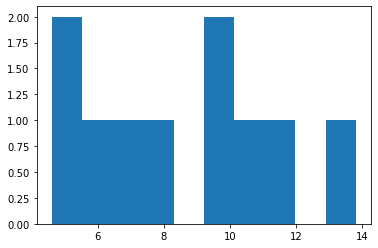

In [18]:
#plt.hist(scattered_pT)
plt.hist(photon_pT)

(array([2., 1., 1., 1., 0., 2., 1., 1., 0., 1.]),
 array([ 4.61301862,  5.5332896 ,  6.45356058,  7.37383156,  8.29410253,
         9.21437351, 10.13464449, 11.05491547, 11.97518645, 12.89545743,
        13.81572841]),
 <BarContainer object of 10 artists>)

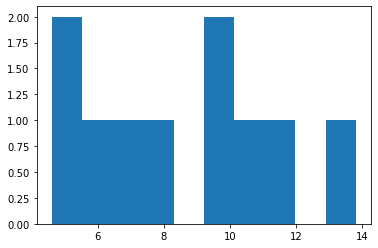

In [19]:
plt.hist(scattered_pT)